In [1]:
import pandas as pd
df = pd.read_csv("../Data/df_score_as_value.tsv", sep="\t", index_col=0)

In [41]:
print(df)

                10q22.3q23.3 microduplication syndrome  \
geneCommonName                                           
7SK                                                NaN   
A1BG                                               NaN   
A1BG-AS1                                           NaN   
A1CF                                               NaN   
A2M                                                NaN   
...                                                ...   
ZYG11A                                             NaN   
ZYG11B                                             NaN   
ZYX                                                NaN   
ZZEF1                                              NaN   
ZZZ3                                               NaN   

                12q14 microdeletion syndrome  \
geneCommonName                                 
7SK                                      NaN   
A1BG                                     NaN   
A1BG-AS1                                 NaN   
A1CF 

In [ ]:
mask = (df < 0.1) | df.isna()

# Step 2: Keep genes where ALL columns are < 0.2 or NaN
genes_all_below_0_2 = df.index[mask.all(axis=1)]

# Optional: Convert to list
low_conf_genes = genes_all_below_0_2.tolist()

print(f"Number of genes with ONLY associations < 0.1: {len(low_conf_genes)}")

Number of genes with ONLY associations < 0.2: 8784


In [17]:
with open("low_conf_genes.txt", "w") as f:
    for gene in low_conf_genes:
        f.write(gene + "\n")

In [ ]:
import pandas as pd
disease = "bipolar disorder"
METHOD = "single_layer_rwr"
FOLDER = "BIPOLAR"
hypergraph_result_df = pd.read_csv(f"../Methods/output/DGIDB_{FOLDER}/{METHOD}_results.csv")

NameError: name 'pd' is not defined

In [3]:
print(hypergraph_result_df)

      Index     Score  ncbi_gene_id claim_name
0        97  0.003570          1544     CYP1A2
1        85  0.003567          1576     CYP3A4
2         0  0.003240          1565     CYP2D6
3        31  0.002708          1813       DRD2
4        47  0.002567          1559     CYP2C9
...     ...       ...           ...        ...
4769   3171  0.000168          9453      GGPS1
4770   3172  0.000168         55117    SLC6A15
4771   3173  0.000168          9266      CYTH2
4772   3174  0.000168          3178    HNRNPA1
4773   2386  0.000168          3742      KCNA6

[4774 rows x 4 columns]


In [7]:
total_genes_in_background = len(hypergraph_result_df)
# Filter genes with a non-NaN score for bipolar disorder
filtered_df = df[df[disease].notna()]
filtered_df = filtered_df.sort_values(by=disease, ascending=False)
# Optional: print the resulting gene names and scores
print(filtered_df[disease].index)
disease_gene_set = filtered_df[disease].index

k = 500
top_k_genes = hypergraph_result_df["claim_name"][:k]

NameError: name 'hypergraph_result_df' is not defined

In [ ]:
# print(filtered_df[disease])
# # Get the index of the filtered dataframe column
# index_list = filtered_df[disease].index.tolist()

# # Write the index list to a text file
# with open("index_list.txt", "w") as f:
#     for idx in index_list:
#         f.write(f"{idx}\n")

geneCommonName
SCN2A         0.727275
DRD2          0.685297
GSK3B         0.625937
HTR2A         0.613610
HTR2C         0.611434
                ...   
DYTN          0.001290
RFC5          0.001273
ALLC          0.001250
ZFP36         0.001225
GUCY2C-AS1    0.001201
Name: bipolar disorder, Length: 2858, dtype: float64


In [8]:
from scipy.stats import hypergeom
# Definitions
M = total_genes_in_background  # e.g., 20000
n = len(disease_gene_set)      # number of disease-related genes in the background
N = k                          # number of top-k genes you're testing
K = len(set(top_k_genes) & set(disease_gene_set))  # overlap: disease genes in your top-k

# Hypergeometric test
p_value = hypergeom.sf(K - 1, M, n, N)
print(f"P-value: {p_value:.4e}")


NameError: name 'total_genes_in_background' is not defined

In [6]:
for k in [50, 100, 200, 500]:
    top_k_genes = hypergraph_result_df["claim_name"][:k]
    K = len(set(top_k_genes) & set(disease_gene_set))
    p = hypergeom.sf(K - 1, M, n, k)
    print(f"k={k}, Overlap={K}, p={p:.4e}")


k=50, Overlap=45, p=nan
k=100, Overlap=94, p=nan
k=200, Overlap=190, p=nan
k=500, Overlap=453, p=nan


Jaccard and wmra


In [35]:
import pandas as pd
METHOD = "unidirectional_multilayer_rwr"
FOLDER1 = "BIPOLAR"
disease = "bipolar disorder"
hypergraph1_result_df = pd.read_csv(f"../Methods/output/DGIDB_{FOLDER1}/{METHOD}_results.csv")
# CENTRALITY = "pagerank"
# hypergraph1_result_df = pd.read_csv(f"./centrality_output/{CENTRALITY}.csv")

# hypergraph1_result_df = pd.read_csv("./GNN_OUTPUTS/OT/BreastCancer/cancerbaselineOT", sep='\t')
# hypergraph1_result_df.columns.values[0] = 'claim_name'
# hypergraph1_result_df.columns.values[1] = 'score'

BIPOLAR_BASELINE = pd.read_csv(f"../Methods/output/DGIDB_BIPOLAR/{METHOD}_results.csv")


In [ ]:
# df: your original Open Targets DataFrame (genes x diseases)

# Step 1: Compute the sum of scores across all diseases for each gene
gene_totals = df.sum(axis=1, skipna=True)

# Step 2: Normalize each value by the corresponding gene's total
normalized_df = df.div(gene_totals, axis=0)

# (Optional) If you want to fill NaNs with 0 (e.g., for ranking):
normalized_df = normalized_df.fillna(0)

In [ ]:
print(normalized_df[disease])

geneCommonName
7SK         0.000000
A1BG        0.003080
A1BG-AS1    0.000000
A1CF        0.000000
A2M         0.000725
              ...   
ZYG11A      0.000000
ZYG11B      0.000000
ZYX         0.000000
ZZEF1       0.000000
ZZZ3        0.020389
Name: bipolar disorder, Length: 25307, dtype: float64


In [36]:
print(hypergraph1_result_df["claim_name"])

0                SRC
1                TNF
2               TP53
3             CYP1A1
4            ALDH1A1
            ...     
21976     SNORD113-7
21977     SNORD114-7
21978    SNORD114-14
21979    SNORD114-17
21980    SNORD114-18
Name: claim_name, Length: 21981, dtype: object


In [37]:
filtered_df = df[df[disease].notna()]
filtered_df = filtered_df.sort_values(by=disease, ascending=False)
disease_gene_set = filtered_df[disease].index

print(filtered_df[disease])

geneCommonName
SCN2A         0.727275
DRD2          0.685297
GSK3B         0.625937
HTR2A         0.613610
HTR2C         0.611434
                ...   
DYTN          0.001290
RFC5          0.001273
ALLC          0.001250
ZFP36         0.001225
GUCY2C-AS1    0.001201
Name: bipolar disorder, Length: 2858, dtype: float64


In [50]:
import rbo
import numpy as np
from scipy.stats import wasserstein_distance

def ranking_agreement_score(L1_scores: dict, L1_ranking: list, L2_ranking: list, k: int = None) -> float:
    if k is None:
        k = len(L2_ranking)
    
    total = 0
    # Assign proxy scores to L2 based on inverse rank (1-based)
    for idx, item in enumerate(L2_ranking[:k]):
        if item not in L1_scores:
            continue  # skip items not in L1
        
        score_L1 = L1_scores[L1_ranking[idx]]
        score_L2 = L1_scores[item] 

        if score_L1 == 0 or score_L2 == 0:
            continue  # avoid division by zero
        ratio = min(score_L2 / score_L1, score_L1 / score_L2)
        total += ratio

    return total / k
emd_scores = []
def gene_emd(scores1: dict, scores2: list) -> float:
    """
    Compute 1D Earth Mover's Distance between:
    - scores1: dict of gene -> score (full set)
    - scores2: list of genes (subset of scores1 keys)
    
    The distribution for scores2 is taken from scores1 scores for those genes.
    """
    # Filter genes present in scores1
    filtered_genes = [g for g in scores2 if g in scores1]
    if not filtered_genes:
        return 0

    # Use positions 0,1,2,... as bins
    positions = np.arange(len(filtered_genes))

    weights1 = np.array([scores1[g] for g in filtered_genes])
    weights2 = np.ones_like(weights1)  # Uniform weights for scores2 list (each gene counts equally)

    # Normalize weights to sum to 1
    weights1 = weights1 / weights1.sum()
    weights2 = weights2 / weights2.sum()

    return wasserstein_distance(positions, positions, u_weights=weights1, v_weights=weights2)

def weighted_jaccard(base_weights, pred_set):
    # Convert pred_set to weighted if needed, e.g., 1.0 for all
    pred_weights = {k: 1.0 for k in pred_set}

    all_keys = set(base_weights.keys()).union(pred_weights.keys())

    numerator = sum(min(base_weights.get(k, 0.0), pred_weights.get(k, 0.0)) for k in all_keys)
    denominator = sum(max(base_weights.get(k, 0.0), pred_weights.get(k, 0.0)) for k in all_keys)

    return numerator / denominator if denominator > 0 else 0.0
wmra_scores = []
jaccard_scores = []
def dcg_at_k(relevance, k):
    relevance = np.asfarray(relevance)[:k]
    if relevance.size == 0:
        return 0.0
    return np.sum((2**relevance - 1) / np.log2(np.arange(2, relevance.size + 2)))

def ndcg_at_k(y_true, y_pred, k):
    # Sort by predicted scores
    order = np.argsort(y_pred)[::-1]
    true_sorted_by_pred = np.take(y_true, order)

    # Ideal ranking (sorted by true relevance)
    ideal_order = np.argsort(y_true)[::-1]
    ideal_sorted = np.take(y_true, ideal_order)

    dcg = dcg_at_k(true_sorted_by_pred, k)
    idcg = dcg_at_k(ideal_sorted, k)
    return dcg / idcg if idcg > 0 else 0.0



ks = [10, 20, 50, 100, 500]
# Assuming BIPOLAR_BASELINE is a DataFrame with a 'claim_name' column
baseline_claims = list(BIPOLAR_BASELINE['claim_name'])
ndcg_scores = []
normalized_wmra_socres = []
normalized_emd_scores = []
for k in ks:
    top_k_predictions = list(hypergraph1_result_df["claim_name"][:k])
    top_k_truth = list(disease_gene_set[:k])  # ground truth ranking
    top_k_baseline = baseline_claims[:k]

    # ---- RBO (optional, if enabled) ----
    # rbo_score = rbo.RankingSimilarity(top_k_predictions, top_k_truth).rbo(p=p)

    # ---- WMRA ----
    WMRA = ranking_agreement_score(filtered_df[disease], filtered_df[disease].index, top_k_predictions, k)
    wmra_scores.append(WMRA)
    # NORMALIZED WMRA
    normalized_wmra = ranking_agreement_score(normalized_df[disease], normalized_df[disease].index, top_k_predictions, k)
    normalized_wmra_socres.append(normalized_wmra)
    # ---- Jaccard Index ----
    set_pred = set(top_k_predictions)
    set_base = set(top_k_baseline)
    jaccard_index = weighted_jaccard(filtered_df[disease], set_pred)
    jaccard_scores.append(jaccard_index)

    # ---- NDCG ----
    # Build y_true: OpenTargets relevance scores aligned to your predicted gene list
    y_true = [filtered_df[disease].get(gene, 0) for gene in top_k_predictions]
    


    ## EMD
    emd_score = gene_emd(filtered_df[disease], top_k_predictions)
    emd_scores.append(emd_score)

    ## Normalized EMD
    normal_emd_score = gene_emd(normalized_df[disease], top_k_predictions)
    normalized_emd_scores.append(normal_emd_score)
    # # Use a simple descending rank as y_pred if you just want to rank based on your predicted list order
    # y_pred = list(range(k, 0, -1))

    # ndcg = ndcg_at_k(y_true, y_pred, k)
    # ndcg_scores.append(ndcg)

# Print all scores at the end
print("WMRA scores by k:")
for k, wmra in zip(ks, wmra_scores):
    print(f"@{k}: WMRA = {wmra:.4f}")
print("\nNormalized WMRA scores by k:")
for k, wmra in zip(ks, normalized_wmra_socres):
    print(f"@{k}: NORMALIZED WMRA = {wmra:.4f}")
print("\nEMD scores by k:")
for k, emd in zip(ks, emd_scores):
    print(f"@{k}: EMD = {emd:.4f}")
print("\nNORMALIZED EMD scores by k:")
for k, emd in zip(ks, normalized_emd_scores):
    print(f"@{k}: NORMALIZED EMD = {emd:.4f}")


WMRA scores by k:
@10: WMRA = 0.0370
@20: WMRA = 0.0243
@50: WMRA = 0.0561
@100: WMRA = 0.0686
@500: WMRA = 0.0844

Normalized WMRA scores by k:
@10: NORMALIZED WMRA = 0.0264
@20: NORMALIZED WMRA = 0.0132
@50: NORMALIZED WMRA = 0.0266
@100: NORMALIZED WMRA = 0.0202
@500: NORMALIZED WMRA = 0.0121

EMD scores by k:
@10: EMD = 0.8044
@20: EMD = 1.0031
@50: EMD = 3.0449
@100: EMD = 8.2380
@500: EMD = 25.3199

NORMALIZED EMD scores by k:
@10: NORMALIZED EMD = 2.3601
@20: NORMALIZED EMD = 2.7296
@50: NORMALIZED EMD = 9.7566
@100: NORMALIZED EMD = 10.5924
@500: NORMALIZED EMD = 43.4471


In [39]:
import os

parent_folder = "../Methods/output/"  # replace with your path

subfolders = [name for name in os.listdir(parent_folder)
              if os.path.isdir(os.path.join(parent_folder, name))]

subfolders = [
    name.replace("DGIDB_", "") 
    for name in os.listdir(parent_folder)
    if os.path.isdir(os.path.join(parent_folder, name)) and name.startswith("DGIDB_")
]

print(subfolders)

['AIRWAY_HYPERREACTIVITY', 'ARTHRITIS', 'BIPOLAR', 'BREAST_CANCER', 'CROHNS', 'DIABETES_II', 'FULL', 'HEART_FAILURE', 'HIV', 'NEOPLASM_BREAST', 'SCHIZOPHRENIA']


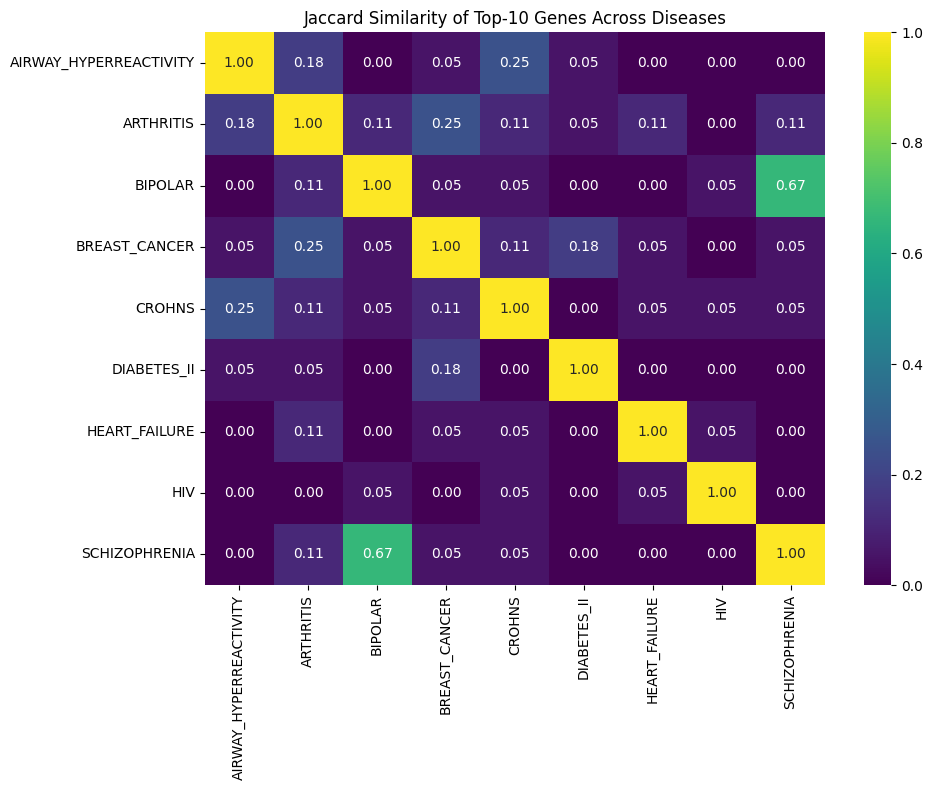

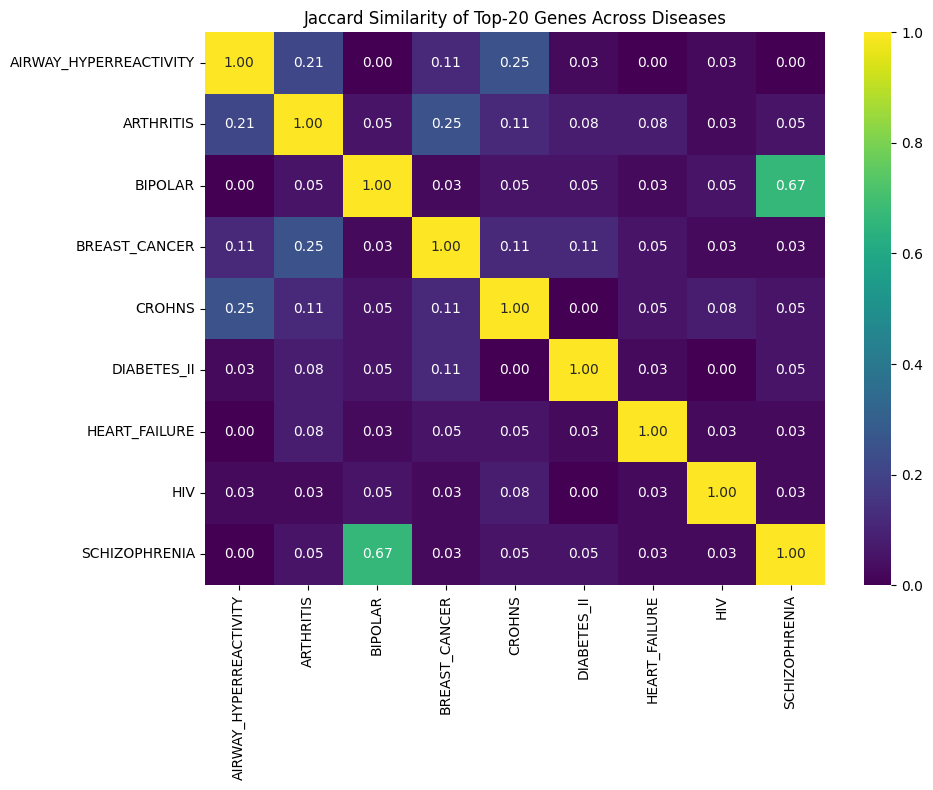

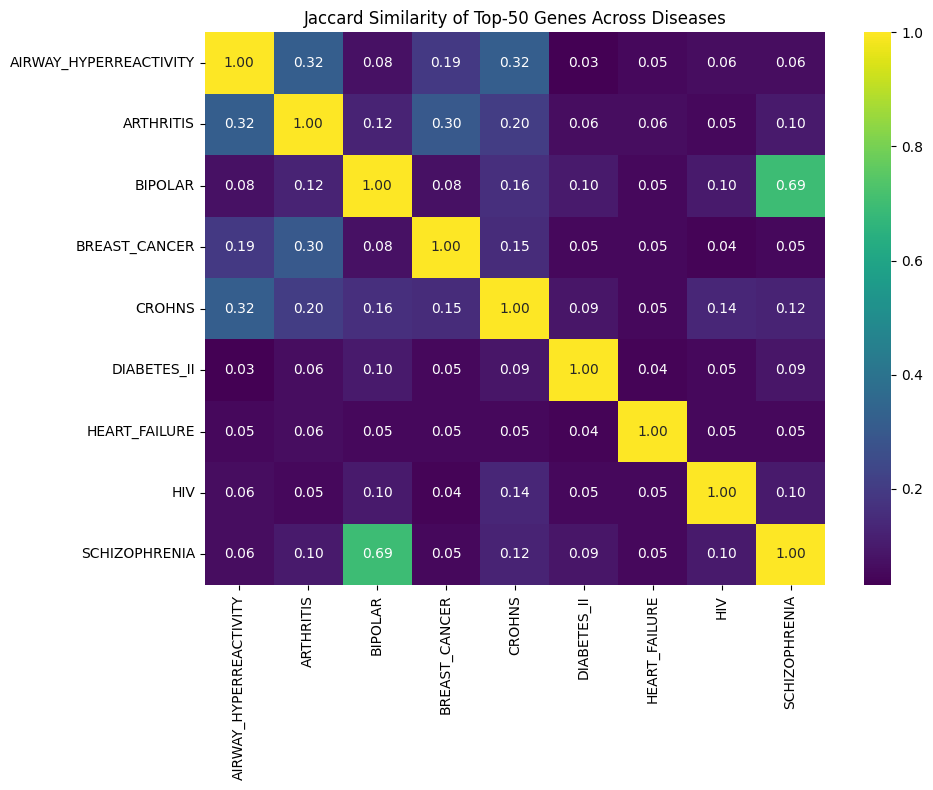

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

def weighted_jaccard(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

disease_list = ['AIRWAY_HYPERREACTIVITY', 'ARTHRITIS', 'BIPOLAR', 'BREAST_CANCER', 'CROHNS', 'DIABETES_II', 'HEART_FAILURE', 'HIV', 'SCHIZOPHRENIA']

ks = [10, 20, 50]
METHOD = 'unidirectional_multilayer_rwr'  # or whatever your method is called

# Dictionary to hold similarity matrices for each k
jaccard_matrices = {k: pd.DataFrame(index=disease_list, columns=disease_list) for k in ks}

# Iterate over all disease pairs (symmetric)
for disease1, disease2 in combinations_with_replacement(disease_list, 2):
    try:
        df1 = pd.read_csv(f"../Methods/output/DGIDB_{disease1}/{METHOD}_results.csv")
        df2 = pd.read_csv(f"../Methods/output/DGIDB_{disease2}/{METHOD}_results.csv")
        # Top predictions for each disease
        for k in ks:
            top_k_1 = set(df1['claim_name'].head(k))
            top_k_2 = set(df2['claim_name'].head(k))
            score = weighted_jaccard(top_k_1, top_k_2)

            # Fill both [i][j] and [j][i] due to symmetry
            jaccard_matrices[k].loc[disease1, disease2] = score
            jaccard_matrices[k].loc[disease2, disease1] = score

    except FileNotFoundError as e:
        print(f"Missing file for {disease1} or {disease2}: {e}")

# Optional: convert all values to float
for k in ks:
    jaccard_matrices[k] = jaccard_matrices[k].astype(float)

# 🔥 Plot heatmaps
for k in ks:
    plt.figure(figsize=(10, 8))
    sns.heatmap(jaccard_matrices[k], annot=True, cmap='viridis', fmt=".2f")
    plt.title(f'Jaccard Similarity of Top-{k} Genes Across Diseases')
    plt.tight_layout()
    plt.savefig(f"heatmap_top{k}.png")
    plt.show()
